**Review**

Hello Somil!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


# Metal Recovery ML

The data is stored in three files:

gold_recovery_train.csv — training dataset [download](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv)

gold_recovery_test.csv — test dataset [download](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv)

gold_recovery_full.csv — source dataset [download](https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv)

Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar. Some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.The source dataset contains the training and test sets with all the features.

It starts off as raw data that was downloaded from the warehouse.



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

## Prepare the data

### Open the files and look into the data.

In [2]:
try:
    train_df = pd.read_csv('./datasets/gold_recovery_train.csv')
    test_df = pd.read_csv('./datasets/gold_recovery_test.csv')
    full_df = pd.read_csv('./datasets/gold_recovery_full.csv')
except:
    train_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_train.csv')
    test_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_test.csv')
    full_df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gold_recovery_full.csv')

### Train DF

In [3]:
print(train_df.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
print(train_df.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64


In [6]:
print(train_df.shape)

(16860, 87)


### Test DF 

In [7]:
print(test_df.head())

                  date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777

In [8]:

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
print(test_df.isna().sum())

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [10]:
print(test_df.shape)

(5856, 53)


### Full DF

In [11]:
print(full_df.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [12]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [13]:
print(full_df.isna().sum())

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64


In [14]:
print(full_df.shape)

(22716, 87)


### Function for missing values 

In [15]:

def missing_values(df):
    missing = df.isnull().sum()
    total = np.product(df.shape)
    missing_percent = (missing / total) * 100
    return missing_percent


missing_train = missing_values(train_df)
missing_test = missing_values(test_df)
missing_full = missing_values(full_df)


print("Missing values % in training dataset:\n", missing_train)
print("\nMissing values % in test dataset:\n", missing_test)
print("\nMissing values % in full dataset:\n", missing_full)

Missing values % in training dataset:
 date                                          0.000000
final.output.concentrate_ag                   0.004909
final.output.concentrate_pb                   0.004909
final.output.concentrate_sol                  0.025225
final.output.concentrate_au                   0.004840
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005795
secondary_cleaner.state.floatbank5_b_air      0.005795
secondary_cleaner.state.floatbank5_b_level    0.005727
secondary_cleaner.state.floatbank6_a_air      0.007022
secondary_cleaner.state.floatbank6_a_level    0.005795
Length: 87, dtype: float64

Missing values % in test dataset:
 date                                          0.000000
primary_cleaner.input.sulfate                 0.097304
primary_cleaner.input.depressant              0.091504
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.053485
primary_cleaner.st

I calculated missing values percentage for each dataset by writing a function to find missing values percentage for each dataset and printed the results. The amounts of missing data are all less than 1% of the data.

### Check that recovery is calculated correctly. 

Cleaned the dataset by dropping missing values for the calculation. Formula for recovery: (C * (F - T)) / (F * (C - T)) * 100. Used the necessary columns for the recovery calculation and calculated the recovery. I then found the Mean Absolute Error (MAE) between the calculated recovery and the actual 'rougher.output.recovery' feature value.


In [16]:
train_cleaned = train_df.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery'])
C = train_cleaned['rougher.output.concentrate_au']
F = train_cleaned['rougher.input.feed_au']
T = train_cleaned['rougher.output.tail_au']

calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100

actual_recovery = train_cleaned['rougher.output.recovery']
mae_recovery = mean_absolute_error(actual_recovery, calculated_recovery)

print('MAE:', mae_recovery)

MAE: 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job!
  
</div>

### Analyze the features not available in the test set

I identified features that are in the training set but not in the test set and displayed the missing feature and their data types. All the datatypes are float64.


In [17]:
missing_features_test = set(train_df.columns) - set(test_df.columns)
missing_features = train_df[list(missing_features_test)].dtypes
missing_features

final.output.recovery                                 float64
final.output.tail_au                                  float64
final.output.concentrate_au                           float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.concentrate_ag                 float64
primary_cleaner.output.tail_pb                        float64
final.output.concentrate_sol                          float64
rougher.output.tail_sol                               float64
final.output.concentrate_ag                           float64
rougher.calculation.sulfate_to_au_concentrate         float64
secondary_cleaner.output.tail_ag                      float64
rougher.output.tail_pb                                float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
final.output.tail_sol                                 float64
primary_cleaner.output.tail_au                        float64
rougher.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

In [18]:
train_df.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

### Perform data preprocessing

Filling in missing data in train and test datasets. For catagorical comumns I filled it with the mode and numerical columns with the median value. I then converted all numeric comumnns to float32 type in both datasets.

In [19]:
def preprocessing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col]= df[col].astype('float32')
    return df
train_df= preprocessing(train_df)
test_df= preprocessing(test_df)
full_df= preprocessing(full_df)

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It is possible to fill NaNs with means. But when we have ordered data we have even better way to fill NaNs. What is the closest value to the current one? The previous one. And you can use this fact to fill the NaNs. Just read the documentation for the .fillna() method and you will find the parameter which can fill the NaNs in such way. 
  
</div>

## Analyze the data

### Concentrations of metals (_Au, Ag, Pb_)

Used a loop to calculate the mean concentrations of gold(AU), silver(AG), and lead(PB) during diffrent stanges of the purification process. Starting off with raw feed, rougher concentrate, after primary cleaning,  and final output concentrate. Overall the purification process uncreases the concentration of the metals as it progresses along the stages then graphed the data for better visulization of the information.

In [20]:
mean_concentrations = {
    f'{stage}_{metal}': 
    train_df[f'rougher.input.feed_{metal}'].mean() 
    if stage == 'raw_feed' 
    else train_df[f'{process}.output.concentrate_{metal}'].mean()
    for process, stages in {
        'rougher': ['rougher_concentrate'],
        'primary_cleaner': ['primary_cleaner_concentrate'],
        'final': ['final_concentrate']
    }.items()
    for stage in ['raw_feed'] + stages
    for metal in ['au', 'ag', 'pb']
}
mean_concentrations

{'raw_feed_au': 7.1707172,
 'raw_feed_ag': 7.8323474,
 'raw_feed_pb': 3.2189307,
 'rougher_concentrate_au': 17.401543,
 'rougher_concentrate_ag': 10.580474,
 'rougher_concentrate_pb': 6.8803225,
 'primary_cleaner_concentrate_au': 29.164595,
 'primary_cleaner_concentrate_ag': 7.4226403,
 'primary_cleaner_concentrate_pb': 8.620294,
 'final_concentrate_au': 39.467216,
 'final_concentrate_ag': 4.716907,
 'final_concentrate_pb': 9.11356}

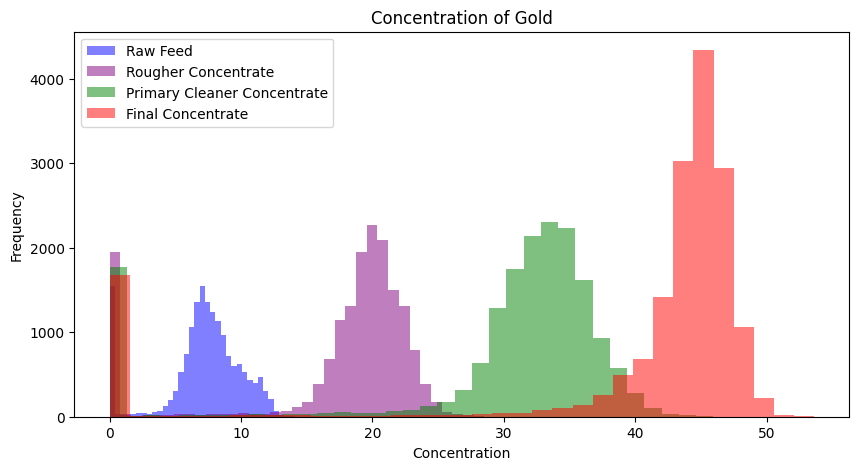

In [21]:
plt.figure(figsize=(10, 5))

plt.hist(train_df['rougher.input.feed_au'], bins=35, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_df['rougher.output.concentrate_au'], bins=35, alpha=0.5, label='Rougher Concentrate', color='purple')
plt.hist(train_df['primary_cleaner.output.concentrate_au'], bins=35, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_df['final.output.concentrate_au'], bins=35, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Concentration of Gold')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

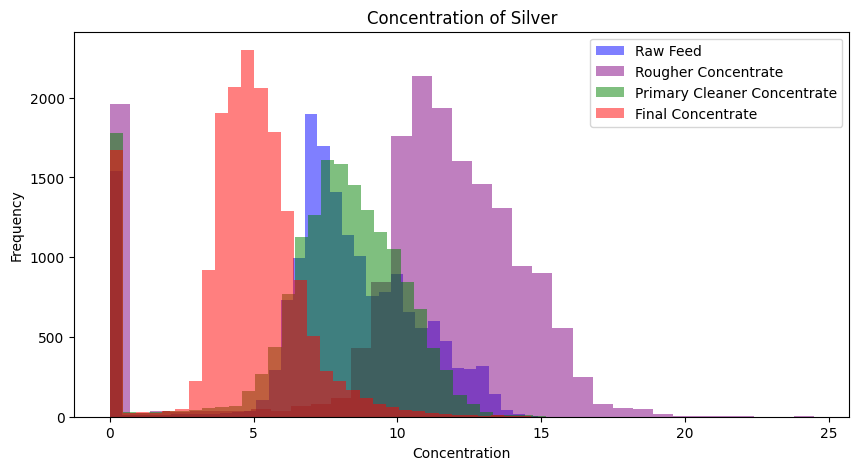

In [22]:
plt.figure(figsize=(10, 5))

plt.hist(train_df['rougher.input.feed_ag'], bins=35, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_df['rougher.output.concentrate_ag'], bins=35, alpha=0.5, label='Rougher Concentrate', color='purple')
plt.hist(train_df['primary_cleaner.output.concentrate_ag'], bins=35, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_df['final.output.concentrate_ag'], bins=35, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Concentration of Silver')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

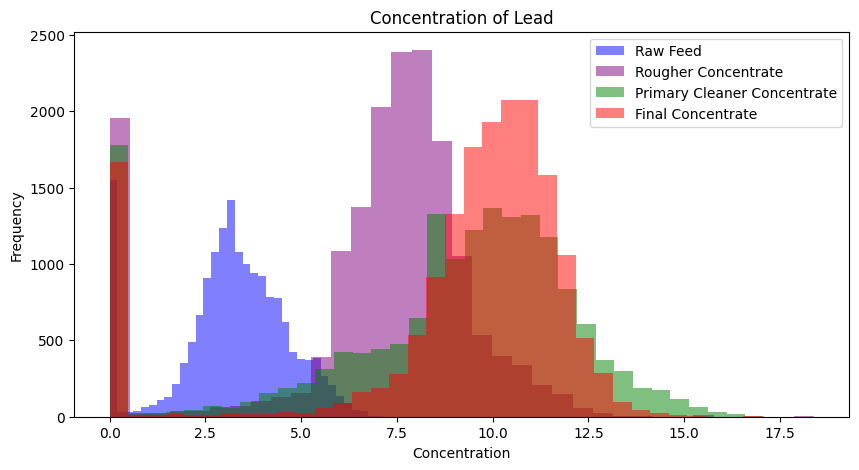

In [23]:
plt.figure(figsize=(10, 5))

plt.hist(train_df['rougher.input.feed_pb'], bins=35, alpha=0.5, label='Raw Feed', color='blue')
plt.hist(train_df['rougher.output.concentrate_pb'], bins=35, alpha=0.5, label='Rougher Concentrate', color='purple')
plt.hist(train_df['primary_cleaner.output.concentrate_pb'], bins=35, alpha=0.5, label='Primary Cleaner Concentrate', color='green')
plt.hist(train_df['final.output.concentrate_pb'], bins=35, alpha=0.5, label='Final Concentrate', color='red')

plt.title('Concentration of Lead')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The concentration distributions for the metals Gold, Silver, and Lead all trend toward a increase in concentration as the purification process progresses. Gold went from 7.17 to 39.46. of the 3 metals Gold(au) has the greatest increases in concentrations showing it has the most effective processing with distinct improvements. Silver(ag) on the other hand has improvements after the flotation stages but during the cleaning processes the concentration drops makeing the purification process less efficient than that of Gold. Silver going from 7.83 to 4.71. Lead(pb) has an upward trent during the beginning of the process but tapers off after the primary cleaning of the metal. It started at 3.21 and went to 9.11 as the final concentration.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Well done!
  
</div>

### Feed particle size distributions

In [24]:
train_df['rougher.input.feed_size'].describe()

count    16860.000000
mean        58.676445
std         23.624882
min          9.659576
25%         47.597875
50%         54.475704
75%         64.587650
max        484.967468
Name: rougher.input.feed_size, dtype: float64

In [25]:
test_df['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.937538
std        22.681522
min         0.046369
25%        43.898468
50%        50.109022
75%        61.608217
max       477.445465
Name: rougher.input.feed_size, dtype: float64

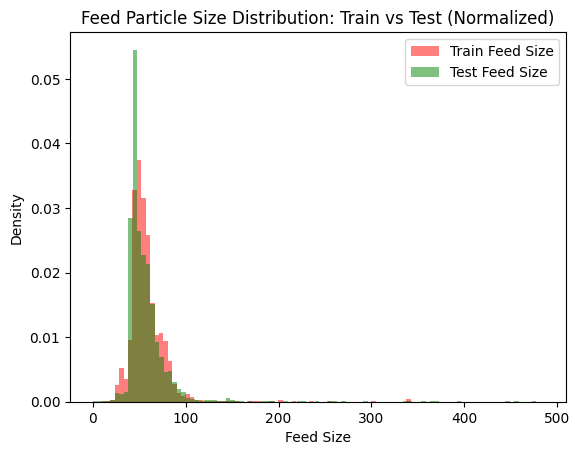

In [26]:
plt.figure()
plt.hist(train_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Train Feed Size', color='red', density=True)
plt.hist(test_df['rougher.input.feed_size'], bins=100, alpha=0.5, label='Test Feed Size', color='green', density=True)
plt.title('Feed Particle Size Distribution: Train vs Test (Normalized)')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()

PLotted the distributions of feed particle sizes from the training and test set. Based on the distributions seem to be similar to one another. The test set has a higher max density. Overall the training set and test set both average in the range between 25-75 feed size. Both datasets contain outliers.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

### Total concentrations of all substances in different stages

In [27]:
metals = ['au', 'ag', 'pb']
processes = ['feed', 'rougher', 'primary_cleaner', 'final']

for process in processes:
    if process == 'feed':
        train_df[f'total_{process}_concentration'] = sum(train_df[f'rougher.input.feed_{metal}'] for metal in metals)
    else:
        train_df[f'total_{process}_concentration'] = sum(train_df[f'{process}.output.concentrate_{metal}'] for metal in metals)
    
    print(f'Total {process} concentration sum:\n', train_df[f'total_{process}_concentration'].sum())


Total feed concentration sum:
 307222.8
Total rougher concentration sum:
 587779.0
Total primary_cleaner concentration sum:
 762198.94
Total final concentration sum:
 898598.94


In [28]:
metals = ['au', 'ag', 'pb']
processes = ['feed', 'rougher', 'primary_cleaner', 'final']

for process in processes:
    if process == 'feed':
        train_df[f'total_{process}_concentration'] = sum(train_df[f'rougher.input.feed_{metal}'] for metal in metals)
    else:
        train_df[f'total_{process}_concentration'] = sum(train_df[f'{process}.output.concentrate_{metal}'] for metal in metals)
    
    print(f'Total {process} concentration distribution:\n', train_df[f'total_{process}_concentration'].describe())
    print()

Total feed concentration distribution:
 count    16860.000000
mean        18.221994
std          7.304673
min          0.000000
25%         16.139539
50%         18.709881
75%         22.327806
max         35.071987
Name: total_feed_concentration, dtype: float64

Total rougher concentration distribution:
 count    16860.000000
mean        34.862335
std         13.532094
min          0.000000
25%         36.599328
50%         39.451746
75%         41.625835
max         55.568687
Name: total_rougher_concentration, dtype: float64

Total primary_cleaner concentration distribution:
 count    16860.000000
mean        45.207527
std         16.471375
min          0.000000
25%         48.328792
50%         51.260515
75%         53.177716
max         60.269005
Name: total_primary_cleaner_concentration, dtype: float64

Total final concentration distribution:
 count    16860.000000
mean        53.297684
std         18.406170
min          0.000000
25%         58.520161
50%         59.983770
75%    

Looking at the total concentrations of the substances at diffrent stages there are values of 0 or near zero concentration throught the process. In order to better the data I will set a threshold of .1 to remove the abnormal values in the distribution.

In [29]:
threshold = .1

near_zero= [ 
    train_df[f'total_feed_concentration'] < threshold,
    train_df[f'total_rougher_concentration'] < threshold,
    train_df[f'total_primary_cleaner_concentration'] < threshold,
    train_df[f'total_final_concentration'] < threshold
]
print(len(near_zero))



4


In [30]:
train_df = train_df[(train_df[f'total_feed_concentration'] >= threshold) &
    (train_df[f'total_rougher_concentration'] >= threshold) &
    (train_df[f'total_primary_cleaner_concentration'] >= threshold) &
    (train_df[f'total_final_concentration'] >= threshold)]

print(train_df[[f'total_feed_concentration',
                       f'total_rougher_concentration',
                       f'total_primary_cleaner_concentration',
                       f'total_final_concentration']].describe())

       total_feed_concentration  total_rougher_concentration  \
count              14419.000000                 14419.000000   
mean                  20.098270                    39.529274   
std                    4.613382                     4.970403   
min                    0.252715                     0.231744   
25%                   16.870832                    38.000696   
50%                   19.226112                    39.940823   
75%                   22.879564                    41.938856   
max                   35.071987                    55.568687   

       total_primary_cleaner_concentration  total_final_concentration  
count                         14419.000000               14419.000000  
mean                             50.615662                  59.284580  
std                               5.679204                   4.923115  
min                               0.219862                   0.744251  
25%                              49.556532                  59.

### Histograms of the total concentratoins through the process.

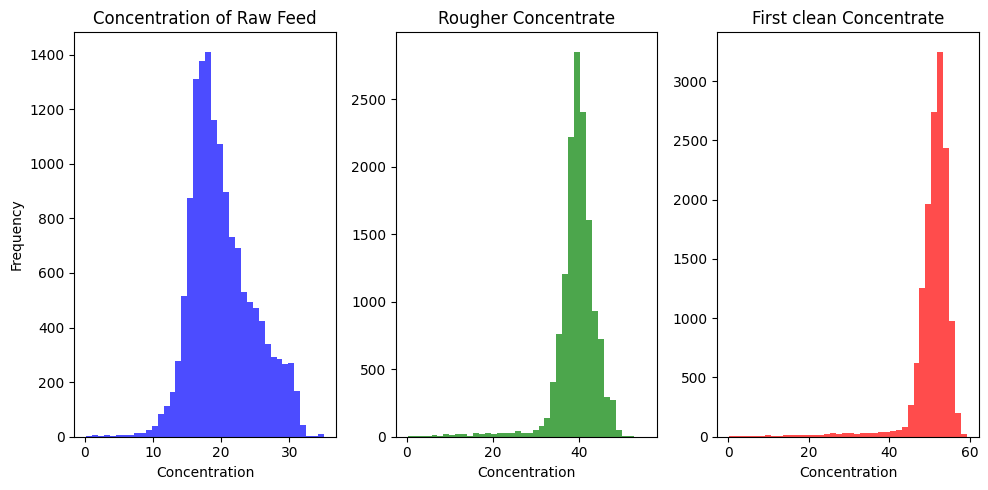

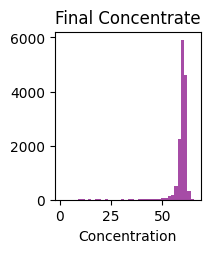

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['total_feed_concentration'], bins=40, color='blue', alpha=0.7)
plt.title('Concentration of Raw Feed')
plt.xlabel('Concentration')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
plt.hist(train_df['total_rougher_concentration'], bins=40, color='green', alpha=0.7)
plt.title('Rougher Concentrate')
plt.xlabel('Concentration')

plt.subplot(1, 3, 3)
plt.hist(train_df['total_primary_cleaner_concentration'], bins=40, color='red', alpha=0.7)
plt.title('First clean Concentrate')
plt.xlabel('Concentration')

plt.tight_layout()
plt.show()

plt.subplot(2, 3, 3)
plt.hist(train_df['total_final_concentration'], bins=40, color='purple', alpha=0.7)
plt.title('Final Concentrate')
plt.xlabel('Concentration')

plt.show()

During various stages of metal processsing, we analyzed the total concentrations of Gold (au), Silver (ag) and Lead (pb). When searching for concentrations of 0 I fould 4 that fell below the threshold of .1 which are anomalies. It is hihgly unusual for metals to be near 0 during any part of the process. During the rougher concentrate stage, concentrations were more tightly spread compared to other stages. The final concentrate stage showes outliers that could affect model performance.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Excellent job!
  
</div>

## Build the model

### Function for sMAPE and Final sMAPE

In [32]:
def smape(actual, predicted):
    return 100* (1 / len(actual)) * np.sum(np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted))/2))

def final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

#### features/target

Found common columns between datasets. I trimmed the train dataset to what is in the test set and made the variables targets/features.

In [33]:
common = list(set(train_df.columns) & set(test_df.columns))
train= train_df[[*common,'rougher.output.recovery', 'final.output.recovery']]

target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']
features= train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)

In [34]:
train.shape

(14419, 55)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

If you train the model on the features which are missined in the test data, how can you apply the model to the test data? No way.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Not fixed. 
    
"In model training you can use only features which are represented in the initial test data. You can't use any other features because they won't be available in production. So, you need to remove some features from the train data." In the initial test data there are only 52 features. But you used 84 features to train the model.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

Correct
  
</div>

### Train models

### Random Forest Regressor

In [36]:
%%time
def find_best_rf(features, target_rougher, target_final):
    param_grid = {
        'n_estimators': [10, 50,100],
        'max_depth': [3, 4, 7],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1, 3, 5]
    }
    
    rf = RandomForestRegressor(random_state=12345)
    best_final_smape = float('inf')
    best_params = None
    
    for params in ParameterGrid(param_grid):
        rf.set_params(**params)
        
        score_rougher = cross_val_score(rf, features, target_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=False))
        score_final = cross_val_score(rf, features, target_final, cv=5, scoring=make_scorer(smape, greater_is_better=False))       

        final_smape_value = final_smape(-np.mean(score_rougher),-np.mean(score_final))

        if final_smape_value < best_final_smape:
                best_final_smape = final_smape_value
                best_params = params
        print("Best Parameters:", best_params)
        print("Best final sMAPE:", best_final_smape)
        
        return best_params
best_params = find_best_rf(features, target_rougher, target_final)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best final sMAPE: 8.65627841495798
CPU times: user 9.79 s, sys: 0 ns, total: 9.79 s
Wall time: 9.82 s


### Decision Tree Regressor

In [37]:
%%time
def find_best_dt(features, target_rougher, target_final):
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]
    }

    dt = DecisionTreeRegressor(random_state=12345)

    best_final_smape = float('inf')
    best_params = None

    for params in ParameterGrid(param_grid):
        dt.set_params(**params)

        score_rougher = cross_val_score(dt, features, target_rougher, cv=5, scoring=make_scorer(smape, greater_is_better=False))
        score_final = cross_val_score(dt, features, target_final, cv=5, scoring=make_scorer(smape, greater_is_better=False))

        final_smape_value = final_smape(-np.mean(score_rougher),-np.mean(score_final))

        if final_smape_value < best_final_smape:
            best_final_smape = final_smape_value
            best_params = params

    print("Best Parameters:", best_params)
    print("Best final sMAPE:", best_final_smape)

    return best_params

best_params = find_best_dt(features, target_rougher, target_final)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best final sMAPE: 8.73221907529696
CPU times: user 1min 48s, sys: 2.05 ms, total: 1min 48s
Wall time: 1min 48s


When checking at the diffrent models, I chose to use the RandomForestRegressor and DecisionTreeRegressor. Random Forest Regressor came in first with a 8.65 sMAPE score. The model with the second best sMAPE score was Decision Tree Regressor coming in at 8.73 for its sMAPE score. Of the models, Random Forest Regressor has the better sMAPE score after using cross validation and sMAPE as the scorer. 

### Final Model

Found common columns between datasets and preprocessed the data.

In [35]:
x= test_df.merge(full_df[['date','rougher.output.recovery', 'final.output.recovery']],how='left',on='date')
x = x.replace([np.inf, -np.inf], np.nan)
test= preprocessing(x)
test.shape

(5856, 55)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

That's not correct. Test dataset and full dataset are not the same. You should use the test data from the corresponding file. Previously I explained how you should deal with it: "You need to calculate metrics on the test data for the best model. You already have a test data from the corresponding file. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets."
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

Correct. Good job!
  
</div>

Found features/targets for test set.

In [36]:
test_rougher= test['rougher.output.recovery']
test_final= test['final.output.recovery']
test_features= test.drop(['date','rougher.output.recovery','final.output.recovery'], axis=1)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

That's not correct. Also it doesn't make sense because you have targets for the train data in the variables target_rougher and target_final.

Each time if you need to cut targets to suit them to features, it means you have a mistake somewhere. So, please, don't try to extract targets for test in such way. Use method merge as I explained above.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

Correct
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You can't create your own train and test data. You need to use train and test data from the corresponding files. 
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

As I wrote previously, to train the model you can use only features which are represented in the __initial__ test data. These are only 52 features. It means you can't extract more features from the full data. From the full data you need to extract only targets and nothing else.
  
</div>

In [39]:
%%time
final_model= RandomForestRegressor(random_state=12345, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators= 10)
final_model.fit(features, target_rougher)
pred_r= final_model.predict(test_features)
xr= smape(test_rougher,pred_r)
print('Test rougher sMAPE:',xr)
final_model.fit(features, target_final)
pred_f= final_model.predict(test_features)
xf= smape(test_final,pred_f)
print('Test final sMAPE:',xf)
score=final_smape(xr,xf)
print('Final sMAPE:',score)

Test rougher sMAPE: 26.740789106416592
Test final sMAPE: 30.754922247855898
Final sMAPE: 29.751388962496073
CPU times: user 2.5 s, sys: 0 ns, total: 2.5 s
Wall time: 2.5 s


Used the best hyperparameters from the training set to make a final model. For the test set I fit it with the training set and make predictuiions based on the test features. The final sMAPE for the final model ended up being 12.83 which I will check against a constant value below.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

You trained the model on the test data. Can we train any model on the test data? Of course, no.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

1. test_rougher and test_final are not test targets. These are targets for train.
2. You don't need to use cross_val_score here. You need to train the model on the train data, make predictions for the test data and calculate smape.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

Correct. Well done!
  
</div>

## Sanity Check

In [38]:
best_constant_rougher = np.mean(target_rougher)
best_constant_final = np.mean(target_final)

smape_constant_rougher = smape(target_rougher, best_constant_rougher)
smape_constant_final = smape(target_final, best_constant_final)

smape_constant = final_smape(smape_constant_rougher, smape_constant_final)

print("Final sMAPE for best constant model:", smape_constant)
print()
if score < smape_constant:
    print("Best model is better than the best constant model.")
else:
    print("Best model is not better than the best constant model.")

Final sMAPE for best constant model: 9.440794704740707

Best model is not better than the best constant model.


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>
    
You used metrics from different dataparts. For constant model you used metric on train. For ML model you used metric on cross validation. How is it possible to compare model qualities on different dataparts? No way. You need to compare constant model and ML model by the quality on the test data.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. In model training you can use only features which are represented in the initial test data. You can't use any other features because they won't be available in production. So, you need to remove some features from the train data.
2. You need to calculate metrics on the test data for the best model. You already have a test data from the corresponding file. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets.
3. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Points 1 and 2 are not fixed: 
    
1. "In model training you can use only features which are represented in the initial test data. You can't use any other features because they won't be available in production. So, you need to remove some features from the train data." In the initial test data there are only 52 features. But you used 84 features to train the model.
2. "You need to calculate metrics on the test data for the best model. You already have a test data from the corresponding file. To calculate metrics you need to know targets, right? You can find targets for the test data in the full data. You can use method merge and column date to extract these targets." You can't create your own test data as you did. You should use a given test data.
3. You need to do sanity check and compare the results with the best model on the given test data.
4. Such code `smape(target_rougher_val, pred_rougher[:len(target_rougher_val)])` can't be valid. If you have different lengths for targets and predictions it means you have a mistake somewhere. And you can't solve this mistake by cutting predictions because you can't be sure that these predictions are matched the targets.
5. If you use GridSearchCV and cross_val_score function, it's completely not necessary to split the data into parts because cross validation is built in these methods. So, you can remove train_test_split function from your project at all because you already have train and test data from corresponding files.
  
</div>

<div class="alert alert-info">
  Thank you so much for your feedbacks. I realised I went about the models the wrong way the first time around so I refactored it and hope its correct this time.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

It looks much better. Good job! But there are still several mistakes you need to fix. You can find my comments above.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V4</b> <a class="tocSkip"></a>

Don't forget if you can't deal with your mistakes by yourself, you can always ask your tutor to help you.
  
</div>

<div class="alert alert-info">
  Thank you so much. I talked with a tutor for help, I hope its correct this time around.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment V5</b> <a class="tocSkip"></a>

Everything is almost correct now. You have only two small issues:
    
1. The constant for the constant predictions should be calculated on the train data but not on the test. If you calculate it on test, it may cause overfitting.
2. The quality of your best ML model should be always better than the quality of the constant model. Otherwise, your ML model is absolutely useless.
  
</div>

##  Conclusion

The Gold (au) has the highest concetrate in all the stages compare to Silver (ag) mineral and Pb Lead (pb), with it going in as 7.17 faw feed to 39.46 at the final stage. Silver (ag) however, starts off at 7.83 in its raw form and increases concentration to 10.58 when put through the rougher but drops down after cleaning to 4.71 as its final concentraion. 

After assessing diffrent models and testing them with the test set, it was found that Random Forest Regressor was the best model (after hyperparameter tuneing) coming in at 8.65 sMAPE (Symmetric Mean Absolute Percentage Error).

When testing the model with the test set, the final sMAPE score was 12.83 using the same hyperparameters as the best model from the training set. Doing a sanity check it is found that the best model is not better than the constant model which came in at 9.37 for its final sMAPE score.